# Ulzii-Utas.H HW6

In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need 
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import bernoulli

import numpy as np
import statistics
import time
from numba import jit, cuda, vectorize

## 1-a

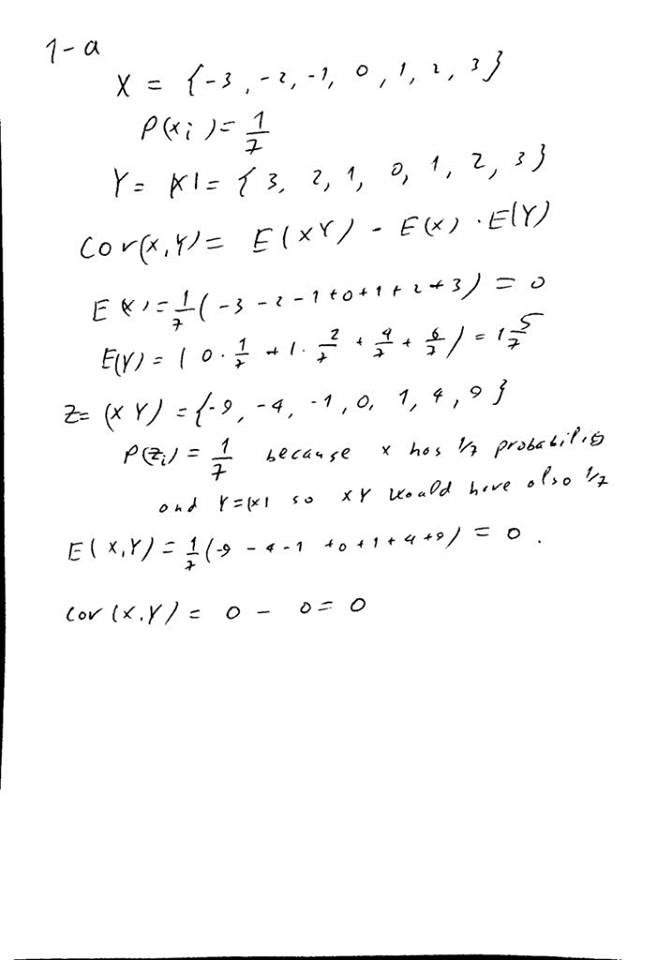

## 1-b

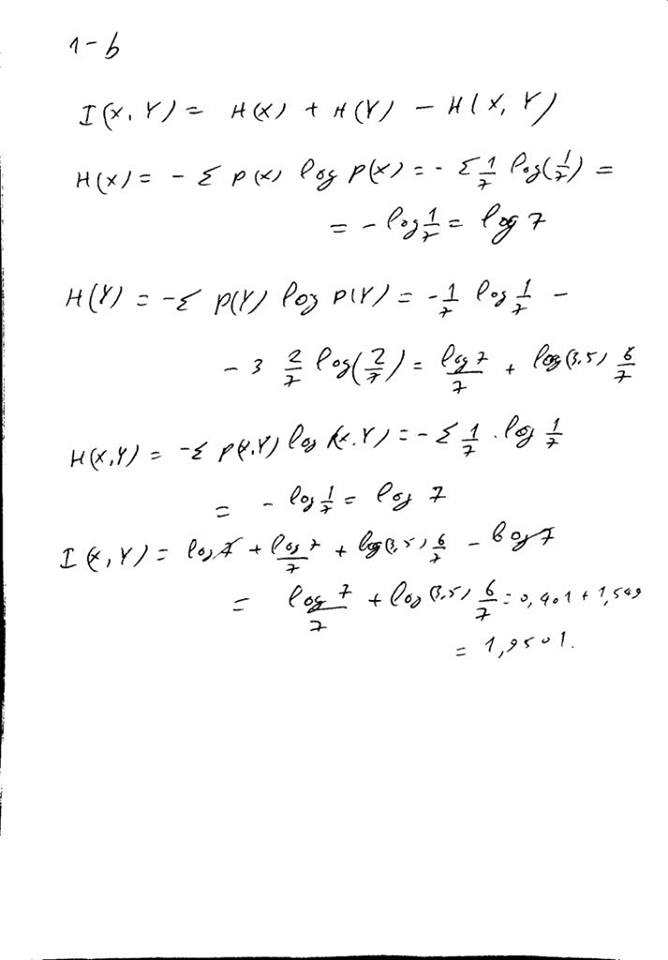

## 1-c

In [9]:
X = np.array([-3, -2, -1, 0, 1, 2, 3]);
X_p = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]);
Y = np.array([0, 1, 2, 3]);
Y_p = np.array([1/7, 2/7, 2/7, 2/7]);

sample_size = np.array([100, 1000, 10000]);

In [35]:

for i in range(3):
    sample_x = np.random.choice(X, sample_size[i], p=X_p);
    sample_y = np.abs(sample_x);
    
    mx = np.sum(sample_x) / sample_size[i];
    my = np.sum(sample_y) / sample_size[i];
    
    cov = np.dot((sample_x - mx), (sample_y - my)) / sample_size[i];
    
    sample_xy = sample_x * sample_y;
    
    prob_x_from_sample = np.zeros(7);    
    prob_y_from_sample = np.zeros(4);    
    prob_xy_from_sample = np.zeros(7);
    
    for j in range(7):        
        prob_x_from_sample[j] = np.count_nonzero(sample_x == X[j]) / sample_size[i];
        
        prob_xy_from_sample[j] = np.count_nonzero(sample_xy == (X[j]*Y[j])) / sample_size[i];
        
    for j in range(4):        
        prob_y_from_sample[j] = np.count_nonzero(sample_y == Y[j]) / sample_size[i];
        
    print("sample p_x: ",prob_x_from_sample)
    print("sample p_y: ",prob_y_from_sample)
    print("sample p_xy: ",prob_xy_from_sample)
    
    h_x = -np.sum(prob_x_from_sample * np.log2(prob_x_from_sample));
    h_y = -np.sum(prob_y_from_sample * np.log2(prob_y_from_sample));
    h_xy = -np.sum(prob_xy_from_sample * np.log2(prob_xy_from_sample));
    
    I = h_x + h_y - h_xy;
    
    print("Covariance of XY from {} sample: {}".format(sample_size[i], cov));
    print("Mutual Information of XY from {} sample: {}\n".format(sample_size[i], I));

sample p_x:  [0.15 0.09 0.11 0.19 0.09 0.16 0.21]
sample p_y:  [0.36 0.25 0.2  0.19]
sample p_xy:  [0.15 0.09 0.11 0.19 0.09 0.16 0.21]
Covariance of XY from 100 sample: 0.26600000000000007
Mutual Information of XY from 100 sample: 1.9502272952800577

sample p_x:  [0.139 0.145 0.124 0.13  0.14  0.175 0.147]
sample p_y:  [0.286 0.32  0.264 0.13 ]
sample p_xy:  [0.139 0.145 0.124 0.13  0.14  0.175 0.147]
Covariance of XY from 1000 sample: 0.03179999999999996
Mutual Information of XY from 1000 sample: 1.932416228775181

sample p_x:  [0.1381 0.1374 0.1447 0.1445 0.1539 0.1385 0.1429]
sample p_y:  [0.281  0.2759 0.2986 0.1445]
sample p_xy:  [0.1381 0.1374 0.1447 0.1445 0.1539 0.1385 0.1429]
Covariance of XY from 10000 sample: 0.013110280000000018
Mutual Information of XY from 10000 sample: 1.9511258652219063



As we get more sample, our covariance gets closer to 0 which goes to same value as the calculation from 1-a. While the mutual information has very similar value to 1-b even in 100 sample size.